In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import qutip as qt 
from CD_control_optimization.batch_optimizer import BatchOptimizer
from CD_control_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
from CD_control_optimization.optimization_sweeps import OptimizationSweeps
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


Need tf version 2.3.0 or later. Using tensorflow version: 2.3.1



ModuleNotFoundError: No module named 'seaborn'

In [2]:
#first, the optimization options.
N = 50 #hilbert space size
alpha_cat = 2 + 1j #desired cat alpha
params = {
'N_blocks' : 6, #number of blocks in circuit
'N_multistart' : 10, #number of optimizations to run in parallel
'epochs' : 20, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.99, #terminal fidelitiy
'use_displacements' : False, #use D operators in optimization
'no_CD_end' : False, #set final CD = 0
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'alpha_scale' : 0.5, #maximum |alpha| for random initialization
'initial_states' : [qt.tensor(qt.basis(2,0),qt.basis(N,0))],
'target_states' : [qt.tensor(qt.basis(2,0), (qt.coherent(N,alpha_cat) + qt.coherent(N,-alpha_cat)).unit())],
'name' : 'Cat creation', #name for printing and saving
'filename' : None, 
#if no filename specified, will be saved in this folder with default name #"name.h5" 
'alpha_cat' : alpha_cat, #note: can pass arbitrary parameters, will be saved
}


In [3]:
#create optimization object. 
#Note that initial params will be randomized upon creation
opt = BatchOptimizer(**params)

In [4]:
#print current info. 
opt.print_info()

optimization_type: state transfer
N_multistart: 10
N_blocks: 6
term_fid: 0.99
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 20
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
name: Cat creation
comment: 
alpha_cat: (2+1j)
N_cav: 50
filename: Cat creation.h5

Best circuit parameters found:
betas:         [ 0.63786+1.25153j  0.01629-0.13631j  1.07916-1.86807j -1.6345 -0.10114j
  0.91155+0.50607j -0.17148-0.06853j]
alphas:        [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
phis (deg):    [   0.      -102.75304   -8.92402   -6.74071  -92.7359  -116.37751]
thetas (deg):  [ 123.80764 -114.15993  -98.98757   36.11924   20.00896 -124.92487]
Max Fidelity:  0.128336




In [5]:
#run optimizer.
opt.optimize()
#note that every time an optimizer is run, it will add to the same .h5 file in the filename, saving the data with a new timestamp

Start time: 2020-10-28 13:54:09
 Epoch: 15 / 20 Max Fid: 0.995935 Avg Fid: 0.954850 Max dFid: 0.060598 Avg dFid: 0.009984 Elapsed time: 0:00:14.845692 Remaing time: 0:00:04.948564

 Optimization stopped. Term fidelity reached.

optimization_type: state transfer
N_multistart: 10
N_blocks: 6
term_fid: 0.99
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 20
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
name: Cat creation
comment: 
alpha_cat: (2+1j)
N_cav: 50
filename: Cat creation.h5

Best circuit parameters found:
betas:         [ 3.21177+1.22333j -0.8166 -0.73543j  0.19943-0.20404j  0.40959-1.10106j
 -0.03974-0.67988j -0.30029+0.36514j]
alphas:        [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
phis (deg):    [   0.       175.91875  235.74023 -136.79187 -149.01366   26.42653]
thetas (deg):  [ 89.91893   7.63189  88.37249  49.67548 -16.95883  52.87351]
Max Fidelity:  0.996191


all data saved as: Cat creation.h5
termination reason: term_fid
optimi

'2020-10-28 13:54:09'

In [6]:
#now, we can analyze the results.
#note that all data is stored as a timestamp in a .h5 file
#You can also specify which timestamp you are analyzing. Be defult, it will use the most recent optimization in the file.
#I would recommend using "HDFview" software to understand data structure
filename = opt.filename
analysis = OptimizationAnalysis(filename)
analysis.print_info() #we can print info of best circuit

N_blocks: 6
N_cav: 50
N_multistart: 10
alpha_cat: (2+1j)
alpha_scale: 0.5
beta_scale: 3.0
comment: 
dfid_stop: 1e-06
elapsed_time_s: 14.845692157745361
epoch_size: 10
epochs: 20
learning_rate: 0.01
name: Cat creation
no_CD_end: False
optimization_type: state transfer
term_fid: 0.99
termination_reason: term_fid
use_displacements: False
filename: Cat creation.h5

Best circuit parameters found:
betas:         [ 3.21177+1.22333j -0.8166 -0.73543j  0.19943-0.20404j  0.40959-1.10106j
 -0.03974-0.67988j -0.30029+0.36514j]
alphas:        [ 3.21177+1.22333j -0.8166 -0.73543j  0.19943-0.20404j  0.40959-1.10106j
 -0.03974-0.67988j -0.30029+0.36514j]
phis (deg):    [184.0206 +70.09177j -46.78749-42.13718j  11.42643-11.69036j
  23.46774-63.08617j  -2.27684-38.95431j -17.20564+20.9212j ]
thetas (deg):  [184.0206 +70.09177j -46.78749-42.13718j  11.42643-11.69036j
  23.46774-63.08617j  -2.27684-38.95431j -17.20564+20.9212j ]
Max Fidelity:  0.995935




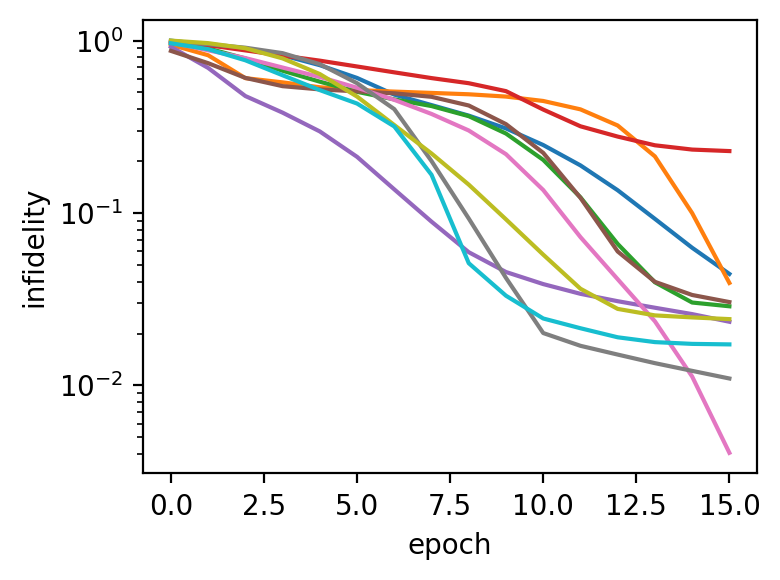

In [7]:
#We can plot the trajectories of the different parallel optimizations
analysis.plot_fidelities()

In [8]:
#We can also load the best circuit, states, and other parameters (see OptimizationAnalysis class)
best_circuit = analysis.best_circuit()
print(best_circuit)
target_state = analysis.target_state()
print(target_state)

{'fidelity': 0.99593514, 'betas': array([ 3.2117655 +1.2233323j , -0.8165957 -0.73543257j,
        0.19942887-0.20403528j,  0.4095894 -1.1010613j ,
       -0.03973835-0.679881j  , -0.300295  +0.36514387j], dtype=complex64), 'alphas': array([ 3.2117655 +1.2233323j , -0.8165957 -0.73543257j,
        0.19942887-0.20403528j,  0.4095894 -1.1010613j ,
       -0.03973835-0.679881j  , -0.300295  +0.36514387j], dtype=complex64), 'phis': array([ 3.2117655 +1.2233323j , -0.8165957 -0.73543257j,
        0.19942887-0.20403528j,  0.4095894 -1.1010613j ,
       -0.03973835-0.679881j  , -0.300295  +0.36514387j], dtype=complex64), 'thetas': array([ 3.2117655 +1.2233323j , -0.8165957 -0.73543257j,
        0.19942887-0.20403528j,  0.4095894 -1.1010613j ,
       -0.03973835-0.679881j  , -0.300295  +0.36514387j], dtype=complex64)}
Quantum object: dims = [[2, 50], [1, 1]], shape = (100, 1), type = ket
Qobj data =
[[ 1.16083086e-01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 2.46249408e-01+3.28332

In [ ]:
#Now, using the same opt object, we can sweep the number of blocks in the optimization.
sweeper = OptimizationSweeps(opt_object=opt)
sweeper.N_blocks_sweep(min_N_blocks=3, max_N_blocks=6, terminate=True) #"terminate" option specifies if it terminates sweep when term fid is met

In [ ]:
#the sweep data will be nicely saved to the same h5 file. We can analyze the sweep with the sweep analysis class.
sweep_analysis = OptimizationSweepsAnalysis(filename=filename)
sweep_analysis.sweep_names #names of the sweeps it found in the file

In [ ]:
#we can analyze how the best fidelity found depends on the sweep parameter
sweep_analysis.plot_sweep_fidelities(log=False)

In [ ]:
#there are a few other things we can plot. Better data analysis coming soon.
analysis.plot_mag_betas()

In [ ]:
analysis.plot_phase_betas()

In [ ]:
analysis.plot_mag_alphas()

In [ ]:
analysis.plot_phase_alphas()

In [ ]:
analysis.plot_average_magnitude_alpha()

In [ ]:
analysis.plot_average_magnitude_beta()

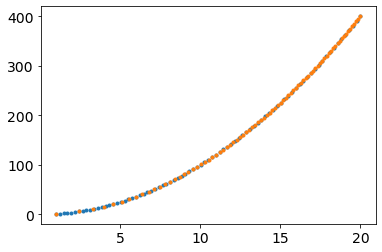

In [15]:
xs = np.linspace(1,20,81)
plt.plot(xs, xs**2, '.')
xs2 = np.sqrt(np.linspace(xs[0]**2, xs[-1]**2, len(xs)))
plt.plot(xs2, xs2**2, '.')